# How to use the `bubble_plot` module

This Jupyter notebook provide an example of how the `bubble_plot` module can be used.

In this example I have labelled random BibTeX references in `example/references.bib` using the `note` entry.

I then want to automatically generate bubble plots where facets are some of the labels.

## Parsing references labels

The `bubble_plot` module expect the labelled entries to be of type:

In [1]:
from typing import Sequence, Dict, Tuple
Entries = Sequence[Dict[str, str]]

I first import the library used to parse the references.

In [2]:
import pybtex.database

I define the function to parse the labels of each reference.

In [3]:
import sys
def process_input(bib_file: str, labels_cls: Sequence[str]) -> Entries:
    """Extract labels and values"""
    references = []
    joined_labels_cls = ', '.join(labels_cls)
    bib_input = pybtex.database.parse_file(bib_file, bib_format="bibtex")
    for key, entry in bib_input.entries.items():
        current = {}
        for label in entry.fields['note'].split(','):
            label_cls, label_val = map(lambda s: s.strip(), label.split(':'))
            if label_cls not in labels_cls:
                print((f"[!] The label class: {label_cls} in: "
                       f"{label} of entry {key} is not "
                       f"one of: {joined_labels_cls}."),
                      file=sys.stderr)
                continue
            current[label_cls] = label_val
        references.append(current)
    return references

I define the labels I want to parse.

In [4]:
LABELS = ('Fishes', 'Birds', 'Snakes', 'YEA')

In [5]:
ENTRIES = process_input("./references.bib", LABELS)

In [6]:
from pprint import pprint
pprint(ENTRIES[:3])

[{'Birds': 'Burrowing Owl',
  'Fishes': 'Spanish mackerel',
  'Snakes': 'Eastern Brown Snake',
  'YEA': '2017'},
 {'Birds': 'Burrowing Owl',
  'Fishes': 'Sea mullet',
  'Snakes': 'Eastern Brown Snake',
  'YEA': '2018'},
 {'Birds': 'Burrowing Owl',
  'Fishes': 'Alligator gar',
  'Snakes': 'Boa Constrictor',
  'YEA': '2019'}]


## Optional: Custom color map

I can provide a custom color map for the bubbles. Else a default one will be computed.

The color map is expected to be of type:

In [7]:
ColorMap = Sequence[Tuple[float, float, float]]

In [8]:
NBR_YEAR = len({entry['YEA'] for entry in ENTRIES})

In [9]:
import seaborn as sns
COLOR_MAP = sns.cubehelix_palette(start=0.25, rot=-0.2, light=0.95)[:NBR_YEAR]
COLOR_MAP

[[0.9309021339955961, 0.9589917211174824, 0.9805946814755173],
 [0.7300721144135585, 0.8021476550561174, 0.9078919962629862],
 [0.5737994898892096, 0.6276416836500447, 0.8084014568466886]]

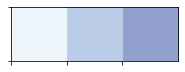

In [10]:
sns.palplot(COLOR_MAP)

## Bubble plot configuration

I then define the bubble plots I want.

In [11]:
import os
from bubble_plot import Config, Facets

I first configure the plots. See the docstring of the `Config` class in `bubble_plot.py` for more explanation.

In [12]:
OUTPUT_DIR = 'output/'
try:
    os.mkdir(OUTPUT_DIR)
except FileExistsError:
    pass

In [13]:
CONFIG = Config(x_left_offset=2,
                x_right_offset=3,
                class_year='YEA',
                field_names=['iy', 'ix', 'nbr', 'years', 'y', 'x'],
                latex_template='../template.tex',
                output_dir=OUTPUT_DIR,
                color_map=COLOR_MAP)

And then define the different bubble plots I want, by describing which label I want on which facet.

In [14]:
PLOTS_PLAN = [
    Facets(y='Snakes', x_left='Fishes', x_right='Birds'),
]

## Bubble plot generation

Finally, I generate the CSV file and prepare the LaTeX file for each plot.

In [15]:
from bubble_plot import build_and_save_plots

In [16]:
build_and_save_plots(ENTRIES, PLOTS_PLAN, CONFIG)

Then, I can take the generated files

In [17]:
os.listdir(OUTPUT_DIR)

['Fishes_Snakes_Birds.csv', 'Fishes_Snakes_Birds.tex']

And use the [bubbleplot](https://github.com/Zar-rok/bubbleplot) Latex package to generate the plot!